
<h1 style="color: red;">Risk Analysis - Employee Benefits Standard</h1>


<H2> LIBRARIES AND IMPORTS <H2>

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, Image
from tabulate import tabulate


<h3> Uploading and Reading the Data <h3>
Our Excel Data is Displayed in a Dataframe

In [30]:

df = pd.read_excel('C:\\Users\\AB0295o\\Desktop\\Full Leave.xlsx', skiprows=[0])
df.head()  


,Plan,Check,Employee ID,Worker Type,Worker Sub Type,Job Profile,Hire Date,Termination Date,Termination Reason,Plan over 6m Period,...,Rounding 0.009,Payout up to 15 min,Payout up to 30 min,Dates,1 Day and Less,2 Day's and Less,3 Day's and Less,4 Day's and Less,5 Day's and Less,International Assignee
0,Accumulated Leave,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accumulated Leave,Sys,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Annual Leave A,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annual Leave A,Sys,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Annual Leave B&C,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploring our Data : How many records of data we have and looking into the unique values we have in each column within our dataset

In [31]:
shape_tuple = df.shape
print("The Number of records we have in our analysis ")
print("Number of rows:", shape_tuple[0])
print("Number of columns:", shape_tuple[1])

The Number of records we have in our analysis 
Number of rows: 80460
Number of columns: 138


In [32]:
# Count unique occurrences of employee IDs
unique_employee_count = df['Employee ID'].nunique()

# Display the result
print("Number of unique employee IDs:", unique_employee_count)

Number of unique employee IDs: 13258


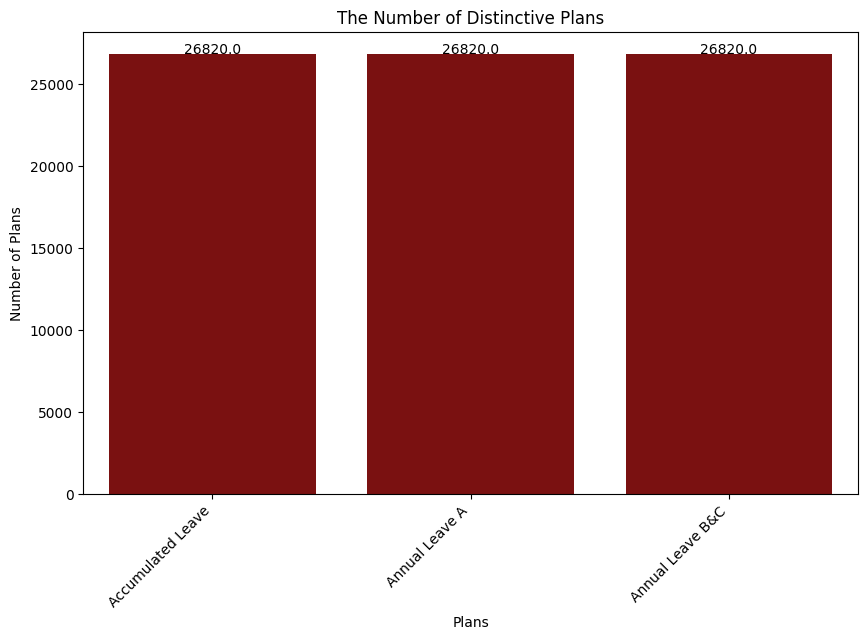

In [33]:
# Define custom color for the bars (dark red)
custom_color = '#8B0000'

# Plot the count of each unique value in the "Plan" column with custom color
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Plan', data=df, color=custom_color)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Set the title
plt.title("The Number of Distinctive Plans")

plt.xlabel('Plans')
plt.ylabel('Number of Plans')
plt.xticks(rotation=45, ha='right')  
plt.show()




<h3 style="color: red;"> Figures are consistent with the evidence provided <h3>

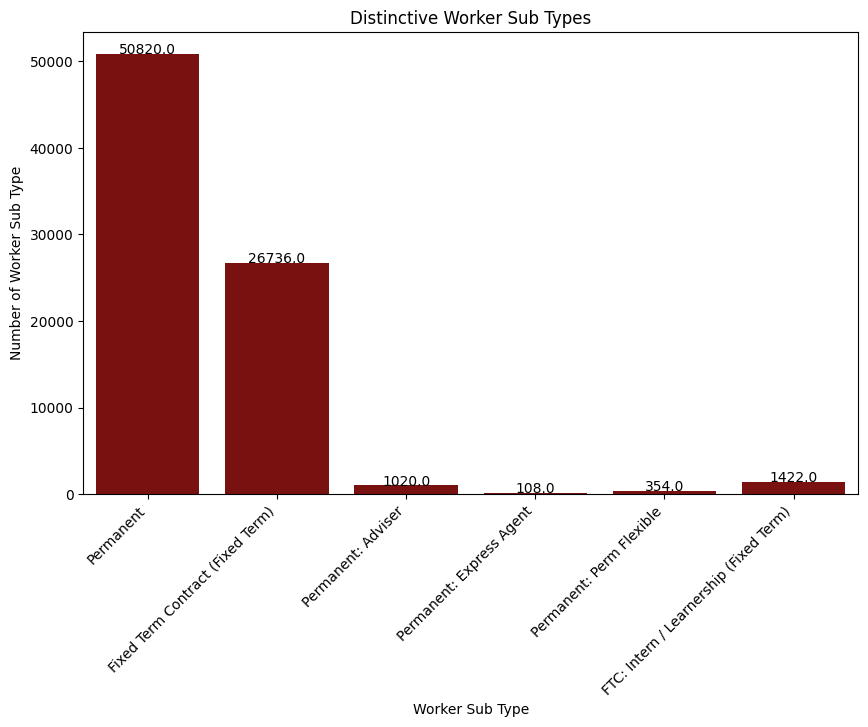

In [34]:
# Define dark red color
dark_red = '#8B0000'

# Plot the count of each unique value in the "Worker Sub Type" column with dark red color
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Worker Sub Type', data=df, color=dark_red)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Distinctive Worker Sub Types")
plt.xlabel('Worker Sub Type')
plt.ylabel('Number of Worker Sub Type')
plt.xticks(rotation=45, ha='right')  
plt.show()



<h3 style="color: red;"> Underpayment Amount per worker subtype <h3>

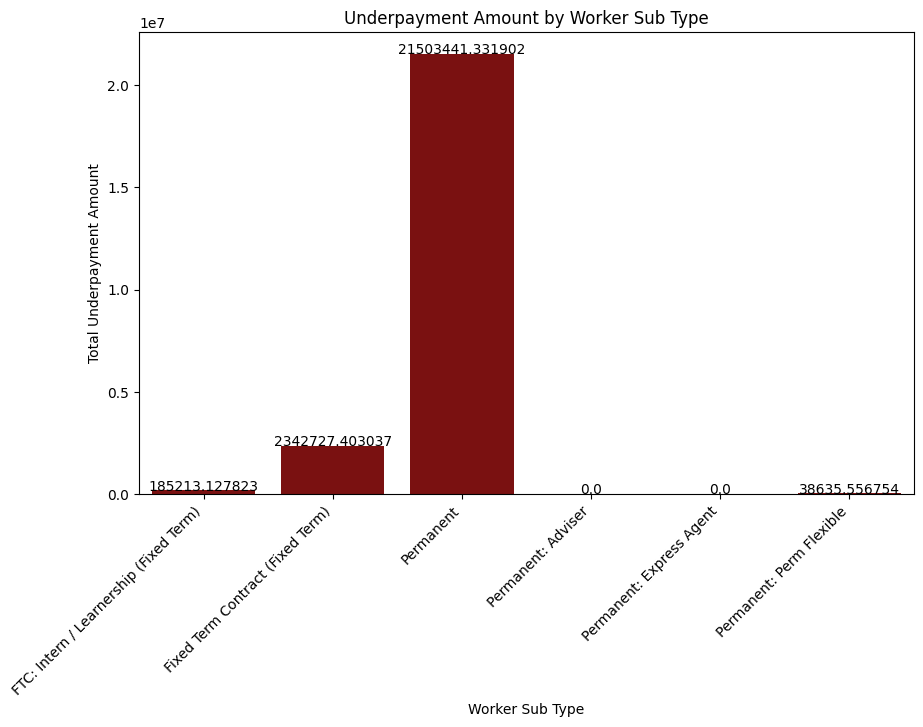

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing data and color definition
dark_red = '#8B0000'

# Calculate sums per 'Worker Sub Type'
sums_underpay = df.groupby('Worker Sub Type')['Underpay Amount'].sum()

# Plot the sum of 'Underpay Amount' for each 'Worker Sub Type'
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sums_underpay.index, y=sums_underpay, color=dark_red)

# Add labels for the sums on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Underpayment Amount by Worker Sub Type")
plt.xlabel('Worker Sub Type')
plt.ylabel('Total Underpayment Amount')
plt.xticks(rotation=45, ha='right')  
plt.show()



<h3 style="color: red;"> Overpayment Amount per worker subtype <h3>

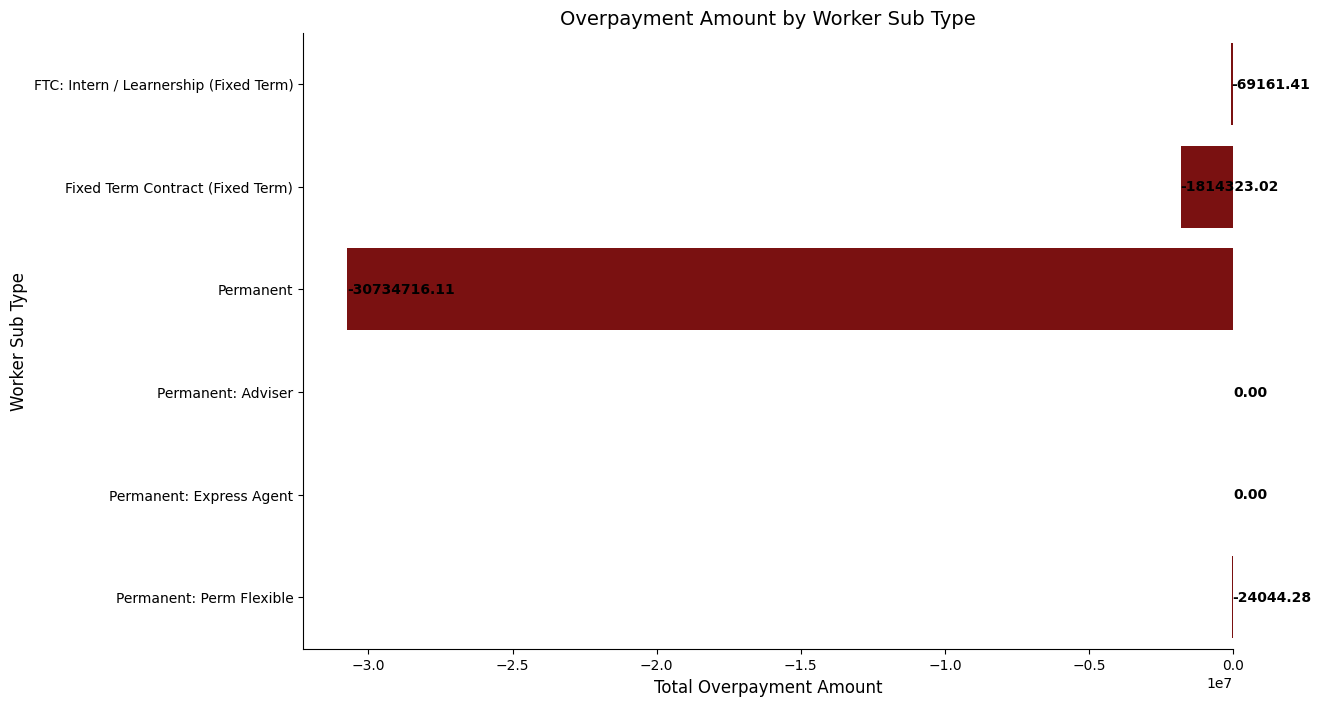

In [36]:

dark_red = '#8B0000'


sums_overpay = df.groupby('Worker Sub Type')['Overpay Amount'].sum()

# Plot the sum of 'Overpay Amount' for each 'Worker Sub Type'
plt.figure(figsize=(12, 8))


ax = sns.barplot(y=sums_overpay.index, x=sums_overpay, color=dark_red)


for idx, value in enumerate(sums_overpay):
    ax.text(value + 5, idx, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black', weight = 'bold')

plt.title("Overpayment Amount by Worker Sub Type", fontsize=14)
plt.xlabel('Total Overpayment Amount', fontsize=12)
plt.ylabel('Worker Sub Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()




<h3 style="color: red;"> Figures are consistent with the evidence provided <h3>

In [37]:
# Get the value counts for 'Job Profile'
job_profile_counts = df['Job Profile'].value_counts()

# Create a DataFrame from the value counts
summary_table = pd.DataFrame({'Job Profile': job_profile_counts.index, 'Count': job_profile_counts.values})


<h3 style="color: red;" >This is the Top 5 Jop Profiles that appeared the most for leaves <h3>

In [38]:
summary_table.head()

,Job Profile,Count
0,Junior Learner,23958
1,Junior Bank Teller (C&B),3330
2,Consultant Sales (FAIS),2508
3,Junior Officer: Customer Service (C&B),1986
4,Officer: Customer Service (C&B),1716


<h3 style="color: red;">This is the Bottom 5 Jop Profiles that appeared the most for leaves <h3>

In [39]:
summary_table.tail()

,Job Profile,Count
861,Head Active Asset Management (FAIS),6
862,Manager: Treasury Management & Trading,6
863,Head Institutional Clients AIMS (FAIS),6
864,Entry Level Specialist: Marketing,6
865,Executive: Assurance,6


<h3 style="color: red;">These are the Reasons of Terminations with their respective numbers <h3>

In [40]:
print("These are the reasons of terminations with their numbers")
# Get the value counts for 'Termination Reason'
termination_reason_counts = df['Termination Reason'].value_counts()
# Create a DataFrame from the value counts
termination_reason_table = pd.DataFrame({'Termination Reason': termination_reason_counts.index, 'Count': termination_reason_counts.values})
# Display the summary table
termination_reason_table

These are the reasons of terminations with their numbers


,Termination Reason,Count
0,End of Fixed Term Contract,26118
1,Career Opportunity,23988
2,Dismissed / Discharged,4416
3,Retirement,4032
4,Work Life Balance,3258
5,Retrenchment without Reassignment,2778
6,Early Retirement,2436
7,Retrenchment with Reassignment,1956
8,Deceased,1662
9,Compensation,1488


In [41]:
# Create an empty DataFrame to store the results
summary_table = pd.DataFrame()

# Mapping of column names
column_mapping = {
    'Month -8': 'Month 6',
    'Month -21': 'Month 5',
    'Month -34': 'Month 4',
    'Month -47': 'Month 3',
    'Month -60': 'Month 2',
    'Month -73': 'Month 1',
    'Month -86': 'Month 0'
}

# Iterate through the 'Has a Balance' columns
for column_name in df.columns:
    if 'Has a Balance' in column_name:
        # Extract the 'Has a Balance' column
        has_balance_column = df[column_name]

        # Count the number of 'Yes' and 'No'
        counts = has_balance_column.value_counts()

        # Assign headings based on the specified mapping
        month_heading = column_mapping.get(column_name, column_name)

        # Add the results to the summary_table DataFrame
        summary_table[month_heading] = counts

# Display the summary table
summary_table.columns = column_mapping.values()
#print("Summary Table:")
#print(summary_table)

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals of 'Has a Balance' for different months:")
summary_table



Summary Table with Column Totals of 'Has a Balance' for different months:


,Month 6,Month 5,Month 4,Month 3,Month 2,Month 1,Month 0
Has a Balance,,,,,,,
Yes,68268,69960,72120,73758,75912,78306,80016
No,12192,10500,8340,6702,4548,2154,444
Total,80460,80460,80460,80460,80460,80460,80460


<h3 style="color: red;"> We consistently have individuals which have a balance brought forward <h3>

Month 6

In [42]:
# Month 6
# Create an empty DataFrame to store the results
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount', 'Daily Rate', 'BP Balance', 'Accrual', 'OTP Days', 'EP Balance']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table



Summary Table with Column Totals:


,OTP Amount,Daily Rate,BP Balance,Accrual,OTP Days,EP Balance
Total,29459007.88,4.010679e+07,398707.451436,43823.228322,12150.41524,380824.880348


Month 5

In [43]:
# Month 5
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.1', 'Daily Rate.1', 'BP Balance.1', 'Accrual.1', 'OTP Days.1', 'EP Balance.1']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.1,Daily Rate.1,BP Balance.1,Accrual.1,OTP Days.1,EP Balance.1
Total,25486930.28,4.131405e+07,380824.880348,44935.152553,9130.03548,398719.52394


Month 4

In [44]:
# Month 4
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.2', 'Daily Rate.2', 'BP Balance.2', 'Accrual.2', 'OTP Days.2', 'EP Balance.2']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.2,Daily Rate.2,BP Balance.2,Accrual.2,OTP Days.2,EP Balance.2
Total,21288478.24,4.292089e+07,398719.52394,46325.638245,8110.2931,416581.422234


Month 3

In [45]:
# Month 3
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.3', 'Daily Rate.3', 'BP Balance.3', 'Accrual.3', 'OTP Days.3', 'EP Balance.3']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.3,Daily Rate.3,BP Balance.3,Accrual.3,OTP Days.3,EP Balance.3
Total,25870854.82,4.414732e+07,416581.422234,47348.963898,10277.53576,431487.322841


Month 2

In [46]:
# Month 2
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.4', 'Daily Rate.4', 'BP Balance.4', 'Accrual.4', 'OTP Days.4', 'EP Balance.4']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.4,Daily Rate.4,BP Balance.4,Accrual.4,OTP Days.4,EP Balance.4
Total,29011247.26,4.552536e+07,431487.322841,48419.913897,12857.09478,407839.622084


Month 1

In [47]:
# Month 1
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.5', 'Daily Rate.5', 'BP Balance.5', 'Accrual.5', 'OTP Days.5', 'EP Balance.5']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.5,Daily Rate.5,BP Balance.5,Accrual.5,OTP Days.5,EP Balance.5
Total,25408508.14,4.708140e+07,407839.622084,48280.13613,11400.712,254575.54202


Month 0 - TERMINATION MONTH

In [48]:
# Month 0 - TERMINATION MONTH
summary_table = pd.DataFrame()

# Columns to include sums
numeric_columns = ['OTP Amount.6', 'Daily Rate.6', 'BP Balance.6', 'Accrual.6', 'OTP Days.6', 'EP Balance.6']

# Iterate through the numeric columns
for column_name in numeric_columns:
    # Extract the numeric column
    numeric_column = df[column_name]

    # Add the sum to the summary_table DataFrame
    summary_table[column_name] = [numeric_column.sum()]

# Add up the totals for each column
summary_table.loc['Total'] = summary_table.sum(axis=0)

# Drop the first row (index 0)
summary_table = summary_table.drop(0)

# Display the updated summary table with totals
print("\nSummary Table with Column Totals:")
summary_table


Summary Table with Column Totals:


,OTP Amount.6,Daily Rate.6,BP Balance.6,Accrual.6,OTP Days.6,EP Balance.6
Total,1.200986e+09,4.747322e+07,254575.54202,35240.490676,450168.55208,215163.165897


<h1 style="color: red;">  Principles used to support our evidence <h1>

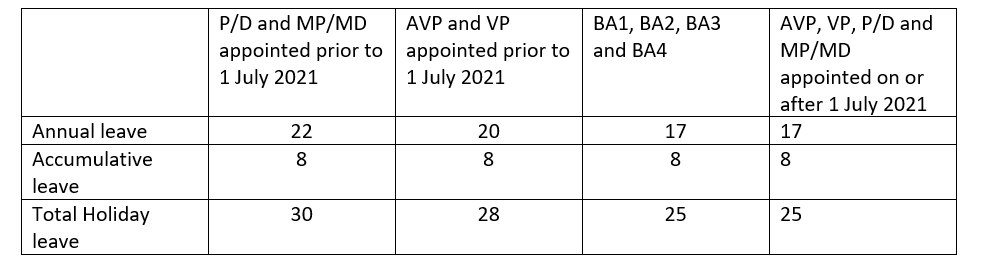

In [49]:
# Provide the file path to your screenshot
image_path13 = "C:/Users/AB0295o/Desktop/Capture 4.png"  # Use forward slashes or double backslashes

# Display the image
display(Image(filename=image_path13))


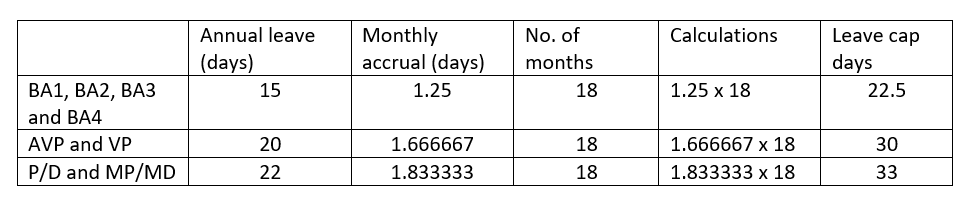

In [50]:
from IPython.display import Image, display

# Provide the file path to your screenshot
image_path2 = "C:/Users/AB0295o/Desktop/Capture 2.png"  # Use forward slashes or double backslashes

# Display the image
display(Image(filename=image_path2))


<H1 style="color: red;"> Calculations performed according to guidelines <H1>

In [51]:
import pandas as pd

# Assuming df is your DataFrame
# Replace NaN with 0 for columns with missing values
df['BP Balance'].fillna(0, inplace=True)
df['Accrual'].fillna(0, inplace=True)
df['EP Balance'].fillna(0, inplace=True)
df['BP Balance.1'].fillna(0, inplace=True)
df['Accrual.1'].fillna(0, inplace=True)
df['EP Balance.1'].fillna(0, inplace=True)
df['BP Balance.2'].fillna(0, inplace=True)
df['Accrual.2'].fillna(0, inplace=True)
df['EP Balance.2'].fillna(0, inplace=True)
df['BP Balance.3'].fillna(0, inplace=True)
df['Accrual.3'].fillna(0, inplace=True)
df['EP Balance.3'].fillna(0, inplace=True)
df['BP Balance.4'].fillna(0, inplace=True)
df['Accrual.4'].fillna(0, inplace=True)
df['EP Balance.4'].fillna(0, inplace=True)
df['BP Balance.5'].fillna(0, inplace=True)
df['Accrual.5'].fillna(0, inplace=True)
df['EP Balance.5'].fillna(0, inplace=True)
df['BP Balance.6'].fillna(0, inplace=True)
df['Accrual.6'].fillna(0, inplace=True)
df['EP Balance.6'].fillna(0, inplace=True)

# Validate the values in 'EP Balance' columns
validation_result = (
    (df['BP Balance'] + df['Accrual'] == df['EP Balance']) &
    (df['BP Balance.1'] + df['Accrual.1'] == df['EP Balance.1']) &
    (df['BP Balance.2'] + df['Accrual.2'] == df['EP Balance.2']) &
    (df['BP Balance.3'] + df['Accrual.3'] == df['EP Balance.3']) &
    (df['BP Balance.4'] + df['Accrual.4'] == df['EP Balance.4']) &
    (df['BP Balance.5'] + df['Accrual.5'] == df['EP Balance.5']) &
    (df['BP Balance.6'] + df['Accrual.6'] == df['EP Balance.6'])
)

# Display rows where validation fails
df[~validation_result]



,Plan,Check,Employee ID,Worker Type,Worker Sub Type,Job Profile,Hire Date,Termination Date,Termination Reason,Plan over 6m Period,...,Rounding 0.009,Payout up to 15 min,Payout up to 30 min,Dates,1 Day and Less,2 Day's and Less,3 Day's and Less,4 Day's and Less,5 Day's and Less,International Assignee
0,Accumulated Leave,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accumulated Leave,Sys,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Annual Leave A,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annual Leave A,Sys,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Annual Leave B&C,Calc,16000156,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,Day's between -0.009 and 0.009 where removed a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80453,Annual Leave B&C,Sys,95000108,Employee,Fixed Term Contract (Fixed Term),Head: Sales & Distribution (4L),2013-06-01,2022-08-31,End of Fixed Term Contract,NaN,...,NaN,NaN,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN
80454,Accumulated Leave,Calc,97000276,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,NaN,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN
80455,Accumulated Leave,Sys,97000276,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,NaN,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN
80456,Annual Leave A,Calc,97000276,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,NaN,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN


<h3 style="color: red;"> 54136 RECORDS RETURNED FROM 'BP Balance + Accrual = EP Balance'  OUT OF 80460 RECORDS, THE OTHER REAMAINING RECORDS TOOK INTO ACCOUNT 'Leave Taken', 'Block Leave Taken'.  <h3>

<h3> WE HAVE 15600 ROWS WHERE [ 'BP Balance' + 'Accrual' - 'Leave Taken' - 'Block Leave' = 'EP Balance' ], THE REMAINDER OF THE ROWS ARE ACCOUNTED FOR WHERE 'BP BALANCE' AND THE REST OF THE COLUMNS ARE ZERO. <h3>

In [52]:
# Assuming df is your DataFrame
# Replace NaN with 0 for columns with missing values
df['BP Balance'] = pd.to_numeric(df['BP Balance'], errors='coerce').fillna(0)
df['Accrual'] = pd.to_numeric(df['Accrual'], errors='coerce').fillna(0)
df['Leave Taken'] = pd.to_numeric(df['Leave Taken'], errors='coerce').fillna(0)
df['Block Leave Taken'] = pd.to_numeric(df['Block Leave Taken'], errors='coerce').fillna(0)
df['EP Balance'] = pd.to_numeric(df['EP Balance'], errors='coerce').fillna(0)

# Validate the equation for 'EP Balance' columns
validation_result = (
    (df['BP Balance'] + df['Accrual'] - df['Leave Taken'] - df['Block Leave'] == df['EP Balance']) &
    (df['BP Balance.1'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Block Leave Taken.1'] == df['EP Balance.1']) &
    (df['BP Balance.2'] + df['Accrual.2'] - df['Leave Taken.2'] - df['Block Leave Taken.2'] == df['EP Balance.2']) &
    (df['BP Balance.3'] + df['Accrual.3'] - df['Leave Taken.3'] - df['Block Leave Taken.3'] == df['EP Balance.3']) &
    (df['BP Balance.4'] + df['Accrual.4'] - df['Leave Taken.4'] - df['Block Leave Taken.4'] == df['EP Balance.4']) &
    (df['BP Balance.5'] + df['Accrual.5'] - df['Leave Taken.5'] - df['Block Leave Taken.5'] == df['EP Balance.5']) &
    (df['BP Balance.6'] + df['Accrual.6'] - df['Leave Taken.6'] - df['Block Leave Taken.6'] == df['EP Balance.6'])
)

# Display rows where validation fails
invalid_rows = df[~validation_result]

# Display the invalid rows
#print("\nRows where validation fails:")
#print(invalid_rows)

# Print the number of rows that pass the test
print("\nNumber of rows passing the test:", len(df) - len(invalid_rows))


TypeError: unsupported operand type(s) for -: 'float' and 'str'

<h3> Count the number of rows where 'BP Balance', 'Accrual', 'Leave Taken', 'Block Leave Taken', and 'EP Balance' are all zero <h3>

In [53]:
# Count the number of rows where 'BP Balance', 'Accrual', 'Leave Taken', 'Block Leave Taken', and 'EP Balance' are all zero
zero_balance_rows = df[(df['BP Balance'] == 0) & (df['Accrual'] == 0) & (df['Leave Taken'] == 0) & (df['Block Leave Taken'] == 0) & (df['EP Balance'] == 0)]

# Print the number of rows with zero balance
print("\nNumber of rows with zero balance:", len(zero_balance_rows))



Number of rows with zero balance: 31943


In [54]:
# Assuming df is your DataFrame
# You may need to adjust column names based on your actual DataFrame

# List of original column names
original_columns = ['Period Date','Leave Plan','Has a Balance','OTP Amount','Daily Rate','Comp Grade','BP Balance','Accrual','Leave Taken','Block Leave Taken','OTP Days','Leave Forfeited','EP Balance']

# Map new column names with the same base name and a number
new_column_names = {col: f'{col} {i+1}' for i, col in enumerate(original_columns)}

# Rename the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)

# Now, df contains columns with new names like 'Worker Sub Type 1', 'Worker Sub Type 2', etc.


<h3 style="color: red;"> Calculated Annual Leave AB&C EP Capped Balance <h3>

In [56]:
# Leave Days Cap

# Convert 'Hire Date', '0 Period Date', and '6 Period Date' to datetime objects
df['Hire Date'] = pd.to_datetime(df['Hire Date'], format='%Y/%m/%d')
df['0 Period Date'] = pd.to_datetime(df['Period Date.6'], format='%Y/%m/%d')
df['6 Period Date'] = pd.to_datetime(df['Period Date 1'], format='%Y/%m/%d')

# Define conditions and corresponding values
conditions = [
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['Comp Grade 6'].isin(['BA1', 'BA2', 'BA3', 'BA4'])) &
        (df['Hire Date'] < pd.to_datetime("2021-07-01")) &
        (df['Period Date.6'] < pd.to_datetime("2021-07-01")) &
        ((df['0 Calculated Annual Leave A EP Balance'] + df['0 Calculated Annual Leave B&C EP Forfeited Balance']) > 22.5)
    ),
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['Comp Grade 6'].isin(['BA1', 'BA2', 'BA3', 'BA4'])) &
        (df['Hire Date'] < pd.to_datetime("2021-07-01")) &
        (df['Period Date.6'] > pd.to_datetime("2021-07-01")) &
        ((df['0 Calculated Annual Leave A EP Balance'] + df['0 Calculated Annual Leave B&C EP Forfeited Balance']) > 25)
    ),
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['Comp Grade 6'].isin(['AVP', 'VP'])) &
        (df['Hire Date'] < pd.to_datetime("2021-07-01")) &
        ((df['0 Calculated Annual Leave A EP Balance'] + df['0 Calculated Annual Leave B&C EP Forfeited Balance']) > 30)
    ),
    # Add more conditions as needed
]

# Corresponding values for each condition
values = [22.5, 25, 30]
#=====---
#-

# Apply the conditions and calculate the 'Result' column
df['Result'] = np.select(conditions, values, default=df['0 Calculated Annual Leave A EP Balance'] + df['0 Calculated Annual Leave B&C EP Forfeited Balance'])

# Print or display the DataFrame to see the results
print(df)


ValueError: time data "(Blank)" doesn't match format "%Y/%m/%d", at position 48. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [57]:
# Get the list of all column names
# all_column_names = df.columns.tolist()

 # Print the list of column names
# print(all_column_names)

<h3 style="color: red;">Calculated Annual Leave B&C EP Forfeited Balance <h3>

In [58]:
# Convert relevant columns to datetime objects
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y/%m/%d')
df['0 Termination Forfeiture Date'] = pd.to_datetime(df['0 Termination Forfeiture Date'], format='%Y/%m/%d')
df['0 Period Date'] = pd.to_datetime(df['0 Period Date'], format='%Y/%m/%d')

# Define conditions
conditions = [
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['0 Comp Grade'].isin(['BA1', 'BA2', 'BA3', 'BA4'])) &
        (df['Termination Date'] >= df['0 Termination Forfeiture Date']) &
        (df['0 Termination Forfeiture Date'].dt.strftime('%Y%m%d') == df['0 Period Date'].dt.strftime('%Y%m%d')) &
        (df['0 Calculated Annual Leave B/C EP Balance'] > 8.50002)
    ),
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['0 Comp Grade'].isin(['AVP', 'VP'])) &
        (df['Hire Date'] < pd.to_datetime("2021-07-01")) &
        (df['Termination Date'] >= df['0 Termination Forfeiture Date']) &
        (df['0 Termination Forfeiture Date'].dt.strftime('%Y%m%d') == df['0 Period Date'].dt.strftime('%Y%m%d')) &
        (df['0 Calculated Annual Leave B/C EP Balance'] > 10.00002)
    ),
    # Add more conditions as needed
]

# Corresponding values for each condition
values = [8.50002, 10.00002]

# Apply the conditions and calculate the 'Result' column
df['Result'] = np.select(conditions, values, default=df['0 Calculated Annual Leave B/C EP Balance'])

# Print or display the DataFrame to see the results
print(df)


KeyError: '0 Termination Forfeiture Date'

<h3 style="color: red;"> Calculated Accumulated Leave Accrual <h3>

In [59]:
# Convert relevant columns to datetime object
df['Hire Date'] = pd.to_datetime(df['Hire Date'], format='%Y/%m/%d')
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y/%m/%d')
df['Period Date.1'] = pd.to_datetime(df['Period Date.1'], format='%Y/%m/%d')

# Define conditions
conditions = [
    (
        (df['Worker Sub Type'].isin(['Permanent', 'Permanent: Express Agent', 'Permanent: Perm Flexible'])) &
        (df['Has a Balance.1'] == "Yes") &
        (df['Hire Date'] + pd.DateOffset(months=5) <= df['Termination Date'])
    ),
    (
        (df['Worker Sub Type'] == "Fixed Term Contract (Fixed Term)") &
        (df['Period Date.1'] >= pd.to_datetime("2019-03-01")) &
        (df['Period Date.1'] < pd.to_datetime("2021-03-01")) &
        (df['Calculated CTC'] <= 205433.30) &
        (df['FTC Emp > 3 Months'] == "Yes") &
        (df['Has a Balance.1'] == "Yes")
    ),
    (
        (df['Worker Sub Type'] == "Fixed Term Contract (Fixed Term)") &
        (df['Period Date.1'] >= pd.to_datetime("2021-03-01")) &
        (df['Period Date.1'] < pd.to_datetime("2022-03-01")) &
        (df['Calculated CTC'] <= 211596.30) &
        (df['FTC Emp > 3 Months'] == "Yes") &
        (df['Has a Balance.1'] == "Yes")
    ),
    (
        (df['Worker Sub Type'] == "Fixed Term Contract (Fixed Term)") &
        (df['Period Date.1'] >= pd.to_datetime("2022-03-01")) &
        (df['Period Date.1'] < pd.to_datetime("2023-03-01")) &
        (df['Calculated CTC'] <= 224080.30) &
        (df['FTC Emp > 3 Months'] == "Yes") &
        (df['Has a Balance.1'] == "Yes")
    ),
    (
        (df['Worker Sub Type'] == "Fixed Term Contract (Fixed Term)") &
        (df['Period Date.1'] >= pd.to_datetime("2023-03-01")) &
        (df['Period Date.1'] < pd.to_datetime("2024-03-01")) &
        (df['Calculated CTC.1'] <= 241110.59) &
        (df['FTC Emp > 3 Months'] == "Yes") &
        (df['Has a Balance.1'] == "Yes")
    )
]

# Corresponding values for each condition
values = [0.66667] * 5

# Apply the conditions and calculate the '5 Calculated Accumulated Leave Accrual' column
df['5 Calculated Accumulated Leave Accrual'] = pd.Series(np.select(conditions, values, default=0), dtype='float64')

# Print or display the DataFrame to see the results
print(df)


ValueError: time data "(Blank)" doesn't match format "%Y/%m/%d", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<h3 style="color: red;"> Calculated Annual Leave A EP Balance <h3>

In [ ]:
# Convert 'Termination Date' to datetime object
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y-%m-%d')

# Define conditions based on the values in 'Plan Check' and 'Check'
conditions = [
    (df['Termination Reason'] == "Term - Function Outsourced") & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc"),
    (df['Termination Reason'] == "No Show") & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc"),
    ((df['Job Profile'] == "Junior Learner") & (df['Termination Date'] < pd.to_datetime("2022-02-01"))) & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc"),
    ((df['Worker Sub Type'].isin(['Permanent: Express Agent', 'Permanent: Adviser'])) & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc")),
    (df['Termination Reason'] == "No Fault termination S197") & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc"),
    (df['Has a Balance'] == "Yes") & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc"),
    ((df['Has a Balance'] == "No") & (df['Has a Balance.1'] == "Yes") & (df["Plan"] == "Accumulated Leave A") & (df["Check"] == "Calc")),
]

# Corresponding values for each condition
values = [
    0.00,
    0.00,
    0.00,
    0.00,
    0.00,
    df['EP Balance'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
    df['BP Balance.1'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
]

# Apply the conditions and calculate the 'Result' column
df['Result'] = np.select(conditions, values, default=0.00000).astype('float64')

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<h3 style="color: red;"> Calculated Annual Leave B/C EP Balance <h3>

In [ ]:
# Convert 'Termination Date' to datetime object
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y-%m-%d')

# Define conditions based on the values in 'Plan Check' and 'Check'
conditions = [
    (df['Termination Reason'] == "Term - Function Outsourced") & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc"),
    (df['Termination Reason'] == "No Show") & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc"),
    ((df['Job Profile'] == "Junior Learner") & (df['Termination Date'] < pd.to_datetime("2022-02-01"))) & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc"),
    ((df['Worker Sub Type'].isin(['Permanent: Express Agent', 'Permanent: Adviser'])) & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc")),
    (df['Termination Reason'] == "No Fault termination S197") & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc"),
    (df['Has a Balance'] == "Yes") & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc"),
    ((df['Has a Balance'] == "No") & (df['Has a Balance.1'] == "Yes") & (df["Plan"] == "Accumulated Leave B&C") & (df["Check"] == "Calc")),
]

# Corresponding values for each condition
values = [
    0.00,
    0.00,
    0.00,
    0.00,
    0.00,
    df['EP Balance'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
    df['BP Balance.1'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
]

# Apply the conditions and calculate the 'Result' column
df['Result'] = np.select(conditions, values, default=0.00000).astype('float64')

# Print or display the DataFrame to see the results
print(df)

                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<h3 style="color: red;"> Calculated Accumulated Leave EP Balance <h3>

In [ ]:
# Convert 'Termination Date' to datetime object
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y-%m-%d')

# Define conditions based on the values in 'Plan Check' and 'Check'
conditions = [
    (df['Termination Reason'] == "Term - Function Outsourced") & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc"),
    (df['Termination Reason'] == "No Show") & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc"),
    ((df['Job Profile'] == "Junior Learner") & (df['Termination Date'] < pd.to_datetime("2022-02-01"))) & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc"),
    ((df['Worker Sub Type'].isin(['Permanent: Express Agent', 'Permanent: Adviser'])) & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc")),
    (df['Termination Reason'] == "No Fault termination S197") & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc"),
    (df['Has a Balance'] == "Yes") & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc"),
    ((df['Has a Balance'] == "No") & (df['Has a Balance.1'] == "Yes") & (df["Plan"] == "Accumulated Leave") & (df["Check"] == "Calc")),
]

# Corresponding values for each condition
values = [
    0.00,
    0.00,
    0.00,
    0.00,
    0.00,
    df['EP Balance'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
    df['BP Balance.1'] + df['Accrual.1'] - df['Leave Taken.1'] - df['Leave Forfeited.1'],
]

# Apply the conditions and calculate the 'Result' column
df['Result'] = np.select(conditions, values, default=0.00000).astype('float64')

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<h3 style="color: red;"> Overpay Amount <h3>

In [ ]:
# Calculate the product of 'Overpay' and ' Daily Rate'
df['Result'] = df['Overpay Amount'] * df['Daily Rate.6']

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<H3 style="color: red;"> Overpay <H3>

In [ ]:
# Define the condition
condition = df['Termination Leave Balance Day\'s - OTP Day\'s Paid'] < 0

# Apply the condition and calculate the 'Result' column
df['Result'] = df['Termination Leave Balance Day\'s - OTP Day\'s Paid'].where(condition, 0.00)

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

In [ ]:
column_names = df.columns
for column in column_names:
    if 'EP Balance' in column:
        print(column)




EP Balance
EP Balance.1
EP Balance.2
EP Balance.3
EP Balance.4
EP Balance.5
EP Balance.6


<H3 style="color: red;"> Termination Leave Balance Day's - OTP Day's Paid <H3>

In [ ]:
# Convert 'Termination Date' to datetime object
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y-%m-%d')

# Define conditions
conditions = [
    (df['Termination Reason'] == "Term - Function Outsourced"),
    (df['Termination Reason'] == "No Show"),
    ((df['Job Profile'] == "Junior Learner") & (df['Termination Date'] < pd.to_datetime("2022-02-01"))),
    ((df['Worker Sub Type'].isin(['Permanent: Express Agent', 'Permanent: Adviser']))),
    (df['Termination Reason'] == "No Fault termination S197"),
]

# Corresponding values for each condition
values = [
    0.00,
    0.00,
    0.00,
    0.00,
    0.00,
]

# Apply conditions and calculate the 'Result' column
df['Result'] = pd.Series(np.select(conditions, values, default=df['Total Termination Leave Balance Days'] - df['OTP Days.6']), dtype='float64')

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<h3 style="color: red;"> Termination Leave Balance Days <h3>

In [ ]:
# Convert 'Termination Date' to datetime object
df['Termination Date'] = pd.to_datetime(df['Termination Date'], format='%Y-%m-%d')

# Define conditions
conditions = [
    (df['Termination Reason'] == "Term - Function Outsourced"),
    (df['Termination Reason'] == "No Show"),
    ((df['Job Profile'] == "Junior Learner") & (df['Termination Date'] < pd.to_datetime("2022-02-01"))),
    ((df['Worker Sub Type'].isin(['Permanent: Express Agent', 'Permanent: Adviser']))),
    (df['Termination Reason'] == "No Fault termination S197"),
]

# Corresponding values for each condition
values = [
    0.00,
    0.00,
    0.00,
    0.00,
    0.00,
]

# Apply conditions and calculate the 'Result' column
df['Result'] = pd.Series(np.select(conditions, values, default=df['EP Balance.6']), dtype='float64')

# Print or display the DataFrame to see the result
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

<h3 style="color: red;">Underpay Amount <h3>

In [ ]:
# Calculate the product of 'Underpay' and '0 Daily Rate'
df['Result'] = df['Underpay Amount'] * df['Daily Rate.6']

# Print or display the DataFrame to see the results
print(df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc     16000156    Employee       Permanent   
1      Accumulated Leave   Sys     16000156    Employee       Permanent   
2         Annual Leave A  Calc     16000156    Employee       Permanent   
3         Annual Leave A   Sys     16000156    Employee       Permanent   
4       Annual Leave B&C  Calc     16000156    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
80455  Accumulated Leave   Sys     97000276    Employee       Permanent   
80456     Annual Leave A  Calc     97000276    Employee       Permanent   
80457     Annual Leave A   Sys     97000276    Employee       Permanent   
80458   Annual Leave B&C  Calc     97000276    Employee       Permanent   
80459   Annual Leave B&C   Sys     97000276    Employee       Permanent   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

In [ ]:
df['Total Amount'] = df[['EP Balance', 'EP Balance.1', 'EP Balance.2', 'EP Balance.3', 'EP Balance.4', 'EP Balance.5', 'EP Balance.6']].sum(axis=1, skipna=True)
df['Total Amount'].fillna(0, inplace=True)

print(df['Total Amount'].sum())



2505191.479364


In [ ]:
ref = (df['Function Outsourced']+ df['No Show']+df['Junior Learner Prior to 1 Feb 2022']+df['Perm Express & Perm Adviser']).sum()
ref

0

In [ ]:
ref = (df['Function Outsourced'] + df['No Show'] + df['Junior Learner Prior to 1 Feb 2022'] + df['Perm Express & Perm Adviser']).fillna(0).sum()
print(ref)


0


<h3 style="color: red;"> Underpay <h3>

In [60]:
# Define the condition
condition = df['Termination Leave Balance Day\'s - OTP Day\'s Paid'] > 0

# Apply the condition and calculate the 'Result' column
df['Result'] = df['Termination Leave Balance Day\'s - OTP Day\'s Paid'].where(condition, 0.00)

# Calculate the sum where the condition is met
sum_result_condition_met = df.loc[condition, 'Result'].sum()

# Calculate the sum where the condition is not met
sum_result_condition_not_met = df.loc[~condition, 'Result'].sum()

# Print the sums
print(f'Sum where condition is met: {sum_result_condition_met}')
print(f'Sum where condition is not met: {sum_result_condition_not_met}')



Sum where condition is met: 9429.947114999999
Sum where condition is not met: 0.0


<h3 style="color: red;"> System Calculated Totals <h3>

In [61]:
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days.1', 
                  'OTP Days Paid in Termination Month.1', 
                  "Termination Leave Balance Day's - OTP Day's Paid.1",
                  "Overpay Day's.1",
                  'Overpay Amount.1',
                  "Underpay Day's.1", 
                  'Underpay Amount.1']

# Calculate the total for each column
totals = df[columns_to_sum].sum()

# Convert the totals to a DataFrame
totals_df = pd.DataFrame(totals).transpose()

# Set the display option to show full floating-point precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the totals DataFrame
totals_df


,Total Termination Leave Balance Days.1,OTP Days Paid in Termination Month.1,Termination Leave Balance Day's - OTP Day's Paid.1,Overpay Day's.1,Overpay Amount.1,Underpay Day's.1,Underpay Amount.1
0,213529.12,225300.89,-3722.39,-12892.87,-32733545.78,9170.48,21861503.39


In [62]:
data = [[32733545.78 
, 21861503.39], [13411, 13410], [2440.98 ,1630.36]]
rows = ['Amounts', 'Count', 'Average Pay']
columns = ['Overpayment Amount (R)', 'Underpayment Amount(R)']
dfs = pd.DataFrame(data, index=rows, columns=columns)

# Display the DataFrame
dfs


,Overpayment Amount (R),Underpayment Amount(R)
Amounts,32733545.78,21861503.39
Count,13411.00,13410.00
Average Pay,2440.98,1630.36


In [63]:
import pandas as pd


file_path = r'C:\Users\AB0295o\Desktop\EMP.xlsx'

# Read the Excel file into a DataFrame
df1 = pd.read_excel(file_path)

# Display the DataFrame
df1.head()


,Employee ID.2
0,16208416
1,16107851
2,16139414
3,16123321
4,16112716


In [67]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days.1', 
                  'OTP Days Paid in Termination Month.1', 
                  "Termination Leave Balance Day's - OTP Day's Paid.1",
                  "Overpay Day's.1",
                  'Overpay Amount.1',
                  "Underpay Day's.1", 
                  'Underpay Amount.1']

# Add both 'Employee ID' and 'Employee ID.2' to the list of grouping columns
grouping_columns = ['Employee ID', 'Employee ID.2']

# Calculate the total for each column, grouped by 'Employee ID' and 'Employee ID.2'
totals = merged_df.groupby(grouping_columns)[columns_to_sum].sum().reset_index()

# Set the display option to show full floating-point precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the totals DataFrame
totals



,Employee ID,Employee ID.2,Total Termination Leave Balance Days.1,OTP Days Paid in Termination Month.1,Termination Leave Balance Day's - OTP Day's Paid.1,Overpay Day's.1,Overpay Amount.1,Underpay Day's.1,Underpay Amount.1
0,16000156.00,16000156.00,11.72,11.72,0.00,0.00,0.00,0.00,2.75
1,16000175.00,16000175.00,10.56,9.31,1.25,0.00,0.00,1.25,998.49
2,16000190.00,16000190.00,26.35,34.10,-7.75,-7.75,-14131.76,0.00,0.00
3,16000231.00,16000231.00,34.18,34.18,-0.00,-0.00,-0.12,0.00,0.00
4,16000263.00,16000263.00,13.33,24.34,-11.01,-11.01,-38486.41,0.00,0.00
...,...,...,...,...,...,...,...,...,...
8519,55031866.00,55031866.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8520,55031884.00,55031884.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8521,94000568.00,94000568.00,50.85,46.31,4.55,0.00,0.00,4.55,20914.97
8522,95000108.00,95000108.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days.1', 
                  'OTP Days Paid in Termination Month.1', 
                  "Termination Leave Balance Day's - OTP Day's Paid.1",
                  "Overpay Day's.1",
                  'Overpay Amount.1',
                  "Underpay Day's.1", 
                  'Underpay Amount.1']

# Add both 'Employee ID' and 'Employee ID.2' to the list of grouping columns
grouping_columns = ['Employee ID', 'Employee ID.2']

# Calculate the total for each column, grouped by 'Employee ID' and 'Employee ID.2'
totals = merged_df.groupby(grouping_columns)[columns_to_sum].sum().reset_index()

# Exclude 'Employee ID' and 'Employee ID.2' from the sum
totals['Total (excluding IDs)'] = totals[columns_to_sum].sum(axis=1)

# Calculate totals vertically (sum each column separately)
vertical_totals = merged_df[columns_to_sum].sum().reset_index().rename(columns={0: 'Vertical Total'})

# Display the vertical totals DataFrame
vertical_totals



,index,Vertical Total
0,Total Termination Leave Balance Days.1,216983.02
1,OTP Days Paid in Termination Month.1,229550.53
2,Termination Leave Balance Day's - OTP Day's Pa...,-4518.13
3,Overpay Day's.1,-13928.39
4,Overpay Amount.1,-35793613.65
5,Underpay Day's.1,9410.26
6,Underpay Amount.1,22511673.14


In [68]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Check if 'Employee ID.2' is in the columns
if 'Employee ID.2' in merged_df.columns:
    print("Column 'Employee ID.2' exists in the DataFrame.")
else:
    print("Column 'Employee ID.2' does not exist in the DataFrame.")


Column 'Employee ID.2' exists in the DataFrame.


In [65]:
import pandas as pd

# Assuming you have DataFrames df and df1

# Concatenate the DataFrames vertically
concatenated_df = pd.concat([df, df1], ignore_index=True)

# Display the concatenated DataFrame
print(concatenated_df)


                    Plan Check  Employee ID Worker Type Worker Sub Type  \
0      Accumulated Leave  Calc  16000156.00    Employee       Permanent   
1      Accumulated Leave   Sys  16000156.00    Employee       Permanent   
2         Annual Leave A  Calc  16000156.00    Employee       Permanent   
3         Annual Leave A   Sys  16000156.00    Employee       Permanent   
4       Annual Leave B&C  Calc  16000156.00    Employee       Permanent   
...                  ...   ...          ...         ...             ...   
89098                NaN   NaN          NaN         NaN             NaN   
89099                NaN   NaN          NaN         NaN             NaN   
89100                NaN   NaN          NaN         NaN             NaN   
89101                NaN   NaN          NaN         NaN             NaN   
89102                NaN   NaN          NaN         NaN             NaN   

                              Job Profile  Hire Date Termination Date  \
0      Entry Level Special

In [66]:
import pandas as pd

# Assuming you have DataFrames df and df1

# Merge the DataFrames based on 'Employee ID' columns
merged_df = pd.merge(df, df1, left_on='Employee ID', right_on='Employee ID.2', how='outer')

# Display the resulting DataFrame
merged_df


,Plan,Check,Employee ID,Worker Type,Worker Sub Type,Job Profile,Hire Date,Termination Date,Termination Reason,Plan over 6m Period,...,Payout up to 30 min,Dates,1 Day and Less,2 Day's and Less,3 Day's and Less,4 Day's and Less,5 Day's and Less,International Assignee,Result,Employee ID.2
0,Accumulated Leave,Calc,16000156.00,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,16000156.00
1,Accumulated Leave,Sys,16000156.00,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,16000156.00
2,Annual Leave A,Calc,16000156.00,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,16000156.00
3,Annual Leave A,Sys,16000156.00,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,16000156.00
4,Annual Leave B&C,Calc,16000156.00,Employee,Permanent,Entry Level Specialist: Operations,2014-03-01,2022-11-20,Career Opportunity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,16000156.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81920,Annual Leave A,Calc,97000276.00,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN,0.00,97000276.00
81921,Annual Leave A,Sys,97000276.00,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN,0.00,97000276.00
81922,Annual Leave B&C,Calc,97000276.00,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN,34.50,97000276.00
81923,Annual Leave B&C,Sys,97000276.00,Employee,Permanent,Executive: Assurance,2012-01-01,2020-01-31,Career Opportunity,NaN,...,NaN,Peiod 1 Des 2019 to 30 June 2023,NaN,NaN,NaN,NaN,NaN,NaN,0.00,97000276.00


In [ ]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days', 
                  'OTP Days Paid in Termination Month', 
                  "Termination Leave Balance Day's - OTP Day's Paid",
                  "Overpay Day's",
                  'Overpay Amount',
                  "Underpay Day's", 
                  'Underpay Amount']

# Add both 'Employee ID' and 'Employee ID.2' to the list of grouping columns
grouping_columns = ['Employee ID', 'Employee ID.2']

# Filter rows where 'Check' column has the value 'Calc'
filtered_df = merged_df[merged_df['Check'] == 'Calc']

# Calculate the total for each column, grouped by 'Employee ID' and 'Employee ID.2'
totals = filtered_df.groupby(grouping_columns)[columns_to_sum].sum().reset_index()

# Exclude 'Employee ID' and 'Employee ID.2' from the sum
totals['Total (excluding IDs)'] = totals[columns_to_sum].sum(axis=1)

# Calculate totals vertically (sum each column separately)
vertical_totals = filtered_df[columns_to_sum].sum().reset_index().rename(columns={0: 'Vertical Total'})

# Display the vertical totals DataFrame
vertical_totals


,index,Vertical Total
0,Total Termination Leave Balance Days,217065.03
1,OTP Days Paid in Termination Month,229333.92
2,Termination Leave Balance Day's - OTP Day's Paid,-4219.51
3,Overpay Day's,-13919.23
4,Overpay Amount,-35702312.69
5,Underpay Day's,9699.72
6,Underpay Amount,25014401.41


In [ ]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days.1', 
                  'OTP Days Paid in Termination Month.1', 
                  "Termination Leave Balance Day's - OTP Day's Paid.1",
                  "Overpay Day's.1",
                  'Overpay Amount.1',
                  "Underpay Day's.1", 
                  'Underpay Amount.1']

# Add both 'Employee ID' and 'Employee ID.2' to the list of grouping columns
grouping_columns = ['Employee ID', 'Employee ID.2']

# Filter rows where 'Check' column has the value 'Calc' and 'Plan' column has the value 'Accumulated Leave'
filtered_df = merged_df[(merged_df['Check'] == 'Calc') & (merged_df['Plan'] == 'Accumulated Leave')]

# Calculate the total for each column, grouped by 'Employee ID' and 'Employee ID.2'
totals = filtered_df.groupby(grouping_columns)[columns_to_sum].sum().reset_index()

# Exclude 'Employee ID' and 'Employee ID.2' from the sum
totals['Total (excluding IDs)'] = totals[columns_to_sum].sum(axis=1)

# Calculate totals vertically (sum each column separately)
vertical_totals = filtered_df[columns_to_sum].sum().reset_index().rename(columns={0: 'Vertical Total'})

# Display the vertical totals DataFrame
vertical_totals


,index,Vertical Total
0,Total Termination Leave Balance Days.1,0.00
1,OTP Days Paid in Termination Month.1,0.00
2,Termination Leave Balance Day's - OTP Day's Pa...,0.00
3,Overpay Day's.1,0.00
4,Overpay Amount.1,0.00
5,Underpay Day's.1,0.00
6,Underpay Amount.1,0.00


In [69]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'

# Find differences between 'Employee ID' and 'Employee ID.2'
differences_df = merged_df[merged_df['Employee ID'] != merged_df['Employee ID.2']]

# Display the DataFrame with differences
print(differences_df[['Employee ID', 'Employee ID.2']])


       Employee ID  Employee ID.2
36     16000371.00            NaN
37     16000371.00            NaN
38     16000371.00            NaN
39     16000371.00            NaN
40     16000371.00            NaN
...            ...            ...
81902  55034843.00            NaN
81903  55034843.00            NaN
81904  55034843.00            NaN
81905  55034843.00            NaN
81924          NaN    16124879.00

[28423 rows x 2 columns]


In [70]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'

# Find differences between 'Employee ID' and 'Employee ID.2'
differences_df = merged_df[merged_df['Employee ID'] != merged_df['Employee ID.2']]

# Display the DataFrame with differences
print("Differences:")
print(differences_df[['Employee ID', 'Employee ID.2']])

# Calculate unique numbers in 'Employee ID' compared to 'Employee ID.2'
unique_employee_id = merged_df['Employee ID'][~merged_df['Employee ID'].isin(merged_df['Employee ID.2'])].unique()

# Display unique numbers in 'Employee ID'
print("\nUnique numbers in 'Employee ID':")
print(unique_employee_id)


Differences:
       Employee ID  Employee ID.2
36     16000371.00            NaN
37     16000371.00            NaN
38     16000371.00            NaN
39     16000371.00            NaN
40     16000371.00            NaN
...            ...            ...
81902  55034843.00            NaN
81903  55034843.00            NaN
81904  55034843.00            NaN
81905  55034843.00            NaN
81924          NaN    16124879.00

[28423 rows x 2 columns]

Unique numbers in 'Employee ID':
[16000371. 16000767. 16000792. ... 55034376. 55034626. 55034843.]


In [71]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'

# Find differences between 'Employee ID' and 'Employee ID.2'
differences_df = merged_df[merged_df['Employee ID'] != merged_df['Employee ID.2']]

# Display the DataFrame with differences
print("Differences:")
print(differences_df[['Employee ID', 'Employee ID.2']])

# Calculate unique numbers in 'Employee ID' compared to 'Employee ID.2'
unique_employee_id = merged_df['Employee ID'][~merged_df['Employee ID'].isin(merged_df['Employee ID.2'])].unique()

# Display unique numbers in 'Employee ID'
print("\nUnique numbers in 'Employee ID':")
print(unique_employee_id)

# Calculate the count of unique values in 'Employee ID'
employee_id_count = merged_df['Employee ID'].nunique()

# Display the count of unique values
print("\nCount of unique Employee IDs:", employee_id_count)


Differences:
       Employee ID  Employee ID.2
36     16000371.00            NaN
37     16000371.00            NaN
38     16000371.00            NaN
39     16000371.00            NaN
40     16000371.00            NaN
...            ...            ...
81902  55034843.00            NaN
81903  55034843.00            NaN
81904  55034843.00            NaN
81905  55034843.00            NaN
81924          NaN    16124879.00

[28423 rows x 2 columns]

Unique numbers in 'Employee ID':
[16000371. 16000767. 16000792. ... 55034376. 55034626. 55034843.]

Count of unique Employee IDs: 13258


In [72]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'

# Find differences between 'Employee ID' and 'Employee ID.2'
differences_df = merged_df[merged_df['Employee ID'] != merged_df['Employee ID.2']]

# Display the DataFrame with differences
print("Differences:")
print(differences_df[['Employee ID', 'Employee ID.2']])

# Calculate unique numbers in 'Employee ID' compared to 'Employee ID.2'
unique_employee_id = merged_df['Employee ID'][~merged_df['Employee ID'].isin(merged_df['Employee ID.2'])].unique()

# Display unique numbers in 'Employee ID'
print("\nUnique numbers in 'Employee ID' not in 'Employee ID.2':")
print(unique_employee_id)

# Calculate the count of unique values in 'Employee ID' not in 'Employee ID.2'
employee_id_not_in_2_count = len(unique_employee_id)

# Display the count of unique values
print("\nCount of unique Employee IDs in 'Employee ID' not in 'Employee ID.2':", employee_id_not_in_2_count)


Differences:
       Employee ID  Employee ID.2
36     16000371.00            NaN
37     16000371.00            NaN
38     16000371.00            NaN
39     16000371.00            NaN
40     16000371.00            NaN
...            ...            ...
81902  55034843.00            NaN
81903  55034843.00            NaN
81904  55034843.00            NaN
81905  55034843.00            NaN
81924          NaN    16124879.00

[28423 rows x 2 columns]

Unique numbers in 'Employee ID' not in 'Employee ID.2':
[16000371. 16000767. 16000792. ... 55034376. 55034626. 55034843.]

Count of unique Employee IDs in 'Employee ID' not in 'Employee ID.2': 4734


In [76]:
import pandas as pd

# Assuming you have the merged DataFrame named 'merged_df'
# Define the columns for which you want to calculate totals
columns_to_sum = ['Total Termination Leave Balance Days', 
                  'OTP Days Paid in Termination Month', 
                  "Termination Leave Balance Day's - OTP Day's Paid",
                  "Overpay Day's",
                  'Overpay Amount',
                  "Underpay Day's", 
                  'Underpay Amount']

# Add both 'Employee ID' and 'Employee ID.2' to the list of grouping columns
grouping_columns = ['Employee ID', 'Employee ID.2']

# Filter rows where 'Employee ID' appears in 'merged_df' but not in 'Employee ID.2'
employee_id_not_in_2 = merged_df[~merged_df['Employee ID'].isin(merged_df['Employee ID.2'])]['Employee ID']

# Filter rows based on the condition for 'Employee ID'
merged_df_for_totals = merged_df[merged_df['Employee ID'].isin(employee_id_not_in_2)]

# Calculate the total for each column, grouped by 'Employee ID'
totals = merged_df_for_totals.groupby('Employee ID')[columns_to_sum].sum().reset_index()

# Exclude 'Employee ID' from the sum
totals['Total (excluding ID)'] = totals[columns_to_sum].sum(axis=1)

# Calculate totals vertically (sum each column separately)
vertical_totals = merged_df_for_totals[columns_to_sum].sum().reset_index().rename(columns={0: 'Vertical Total'})

# Display the vertical totals DataFrame
print("Vertical Totals:")
vertical_totals

# Display the totals DataFrame
#print("\nTotals:")
#print(totals)


Vertical Totals:


,index,Vertical Total
0,Total Termination Leave Balance Days,14512.09
1,OTP Days Paid in Termination Month,16275.24
2,Termination Leave Balance Day's - OTP Day's Paid,-55.56
3,Overpay Day's,-796.75
4,Overpay Amount,-2555702.52
5,Underpay Day's,741.19
6,Underpay Amount,1806091.85
